# Simple random sampling

The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [11]:
import pandas as pd

attrition_pop = pd.read_feather("dataset/attrition.feather")

# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state = 18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

# Systematic sampling

One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

In [12]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

# Is systematic sampling OK?

Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

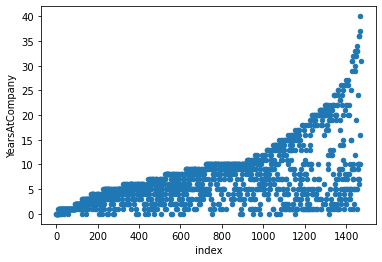

In [13]:
import matplotlib.pyplot as plt
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x = "index", y = "YearsAtCompany", kind = "scatter")
plt.show()

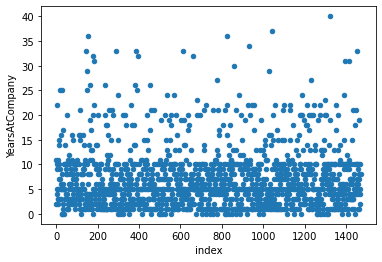

In [14]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop = True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x = "index", y = "YearsAtCompany", kind = "scatter")
plt.show()

# Which sampling method?

So far, you've learned about several sampling methods, including simple random sampling and stratified sampling. It's important to know when to use each of them.

<center><img src="images/02.01.png"  style="width: 400px, height: 300px;"/></center>

# Proportional stratified sampling

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [15]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop["Education"].value_counts(normalize = True)

# Print education_counts_pop
print(education_counts_pop)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


In [20]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education").sample(frac=.4, random_state = 2022)


# Print the sample
# print(attrition_strat)
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


# Equal counts stratified sampling

If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [21]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby("Education").sample(n=30, random_state = 2022)


# Print the sample
# print(attrition_eq)

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq["Education"].value_counts(normalize = True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


# Weighted sampling

Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

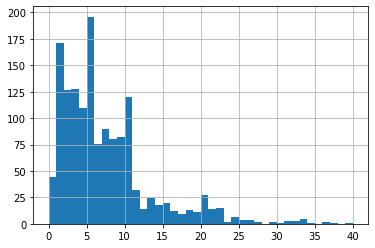

In [23]:
import numpy as np
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop["YearsAtCompany"].hist(bins=np.arange(0,41,1))
plt.show()

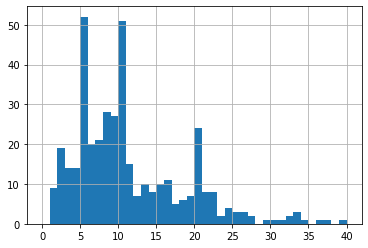

In [25]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights ="YearsAtCompany" )

# Print the sample
# print(attrition_weight)

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Benefits of clustering

Cluster sampling is a two-stage sampling technique that is closely related to stratified sampling. First, you randomly sample which subgroups to include in the sample, then randomly sample rows within each subgroup.

In which of the following situations would cluster sampling be preferable to stratified sampling?

- Collecting an overall sample requires lots of travel from one group to another to collect samples within each group.

# Performing cluster sampling

Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the `JobRole` column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

In [27]:
import random
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop["JobRole"].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, 4)

# Print the result
print(job_roles_samp)

['Manufacturing_Director', 'Research_Director', 'Manager', 'Sales_Representative']


In [37]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop["JobRole"].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
print(attrition_filtered)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1      19        1.0      Travel_Rarely        528                 Sales   
3      18        0.0      Travel_Rarely        812                 Sales   
4      18        1.0  Travel_Frequently       1306                 Sales   
9      18        1.0  Travel_Frequently        544                 Sales   
23     19        1.0  Travel_Frequently        602                 Sales   
...   ...        ...                ...        ...                   ...   
1463   56        0.0      Travel_Rarely       1400  Research_Development   
1464   55        0.0      Travel_Rarely        452  Research_Development   
1465   55        0.0      Travel_Rarely       1117                 Sales   
1466   58        0.0         Non-Travel        350                 Sales   
1469   58        1.0      Travel_Rarely        286  Research_Development   

      DistanceFromHome      Education    EducationField  \
1                   22  Belo

In [41]:
print(attrition_pop["JobRole"].unique())
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
print(attrition_pop["JobRole"].unique())
attrition_pop.info()

['Research_Scientist', 'Sales_Representative', 'Laboratory_Technician', 'Human_Resources', 'Sales_Executive', 'Manufacturing_Director', 'Healthcare_Representative', 'Research_Director', 'Manager']
Categories (9, object): ['Healthcare_Representative', 'Human_Resources', 'Laboratory_Technician', 'Manager', ..., 'Research_Director', 'Research_Scientist', 'Sales_Executive', 'Sales_Representative']
['Research_Scientist', 'Sales_Representative', 'Laboratory_Technician', 'Human_Resources', 'Sales_Executive', 'Manufacturing_Director', 'Healthcare_Representative', 'Research_Director', 'Manager']
Categories (9, object): ['Healthcare_Representative', 'Human_Resources', 'Laboratory_Technician', 'Manager', ..., 'Research_Director', 'Research_Scientist', 'Sales_Executive', 'Sales_Representative']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    ------------

C:\Users\88016\AppData\Local\Temp/ipykernel_25492/1862406922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


In [42]:

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n = 10, random_state = 2022)

# Print the sample
print(attrition_clust)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1380   44        0.0      Travel_Rarely       1099                 Sales   
1395   46        0.0      Travel_Rarely        488                 Sales   
1300   42        0.0      Travel_Rarely        532  Research_Development   
1271   39        0.0      Travel_Rarely        117  Research_Development   
1354   42        0.0      Travel_Rarely       1059  Research_Development   
858    32        0.0      Travel_Rarely        495  Research_Development   
1417   59        0.0         Non-Travel       1420       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1377   52        0.0      Travel_Rarely       1053  Research_Development   
1388   50        0.0      Travel_Rarely        264                 Sales   
1463   56        0.0      Travel_Rarely       1400  Research_Development   
464    46        0.0         Non-Travel       1144  Research_Development   
1313   54   

# 3 kinds of sampling

You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

You'll use the `RelationshipSatisfaction` column of the `attrition_pop` dataset, which categorizes the employee's relationship with the company. It has four levels: `Low`, `Medium`, `High`, and `Very_High`

In [43]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac = 0.25, random_state = 2022)

In [44]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction").sample(frac = 0.25)


In [45]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop["RelationshipSatisfaction"].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, 2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop["RelationshipSatisfaction"].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction").sample(n = len(attrition_pop)//4, random_state = 2022)


C:\Users\88016\AppData\Local\Temp/ipykernel_25492/372349145.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


# Comparing point estimates

Now that you have three types of sample (simple, stratified, and cluster), you can compare point estimates from each sample to the population parameter. That is, you can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the population.

Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, you'll calculate the proportion of employees who left the company (they have an `Attrition` value of 1) for each value of `RelationshipSatisfaction`.

In [46]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [47]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs =  attrition_srs.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_srs)



RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [48]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_strat)




RelationshipSatisfaction
Low          0.275362
Medium       0.144737
High         0.130435
Very_High    0.111111
Name: Attrition, dtype: float64


In [49]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust =  attrition_clust.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_clust)


RelationshipSatisfaction
High         0.149864
Very_High    0.160763
Name: Attrition, dtype: float64
